<a href="https://colab.research.google.com/github/saishdesai23/Loan-Interest-Prediction/blob/main/case_study_1_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study 1

## 1. Importing python libraries

In [510]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2. Loading the data from a csv file into a pandas dataframe

In [511]:
# importing the data set
loan_data = pd.read_csv("/content/loans_full_schema.csv")
loan_data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


## 3. Describing the data set

In [512]:
# Stats of the numerical variables in the dataframe
df1_transposed = loan_data.describe().T
df1_transposed = df1_transposed.reset_index()
df1_transposed.rename(columns={"index":"Column_name"}, inplace=True)

In [513]:
# Describing the details of each column in a data frame
l1 = list(loan_data.columns)
l2 = list(loan_data.dtypes)
l3 = list(loan_data.isna().sum())
data_describe = pd.DataFrame(zip(l1,l2,l3),columns =['Column_name', 'Data_Type','Null_count'])
data_describe['isnull'] = np.where(data_describe['Null_count'] !=0,'T','F')
data_describe['Null_percent'] = round((data_describe['Null_count']*100)/len(loan_data),3)
data_describe['Non_num'] = np.where(data_describe['Data_Type'] =='object','T','F')
data_describe = data_describe.merge(df1_transposed, on='Column_name', how='left')
data_describe

,Column_name,Data_Type,Null_count,isnull,Null_percent,Non_num,count,mean,std,min,25%,50%,75%,max
0,emp_title,object,833,T,8.33,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,emp_length,float64,817,T,8.17,F,9183.0,5.930306,3.703734,0.00,2.0000,6.000,10.0000,1.000000e+01
2,state,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,homeownership,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,annual_income,float64,0,F,0.00,F,10000.0,79222.148412,64734.290492,0.00,45000.0000,65000.000,95000.0000,2.300000e+06
5,verified_income,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,debt_to_income,float64,24,T,0.24,F,9976.0,19.308192,15.004851,0.00,11.0575,17.570,25.0025,4.690900e+02
7,annual_income_joint,float64,8505,T,85.05,F,1495.0,127914.571244,70168.375404,19200.00,86833.5000,113000.000,151545.5000,1.100000e+06
8,verification_income_joint,object,8545,T,85.45,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,debt_to_income_joint,float64,8505,T,85.05,F,1495.0,19.979304,8.054781,0.32,14.1600,19.720,25.5000,3.998000e+01


In [514]:
# listing columns with missing values
data_missing = data_describe[data_describe['isnull'] == 'T']
data_missing

,Column_name,Data_Type,Null_count,isnull,Null_percent,Non_num,count,mean,std,min,25%,50%,75%,max
0,emp_title,object,833,T,8.33,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,emp_length,float64,817,T,8.17,F,9183.0,5.930306,3.703734,0.00,2.0000,6.00,10.0000,10.00
6,debt_to_income,float64,24,T,0.24,F,9976.0,19.308192,15.004851,0.00,11.0575,17.57,25.0025,469.09
7,annual_income_joint,float64,8505,T,85.05,F,1495.0,127914.571244,70168.375404,19200.00,86833.5000,113000.00,151545.5000,1100000.00
8,verification_income_joint,object,8545,T,85.45,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,debt_to_income_joint,float64,8505,T,85.05,F,1495.0,19.979304,8.054781,0.32,14.1600,19.72,25.5000,39.98
11,months_since_last_delinq,float64,5658,T,56.58,F,4342.0,36.760709,21.634939,1.00,19.0000,34.00,53.0000,118.00
20,months_since_90d_late,float64,7715,T,77.15,F,2285.0,46.112473,21.748021,2.00,29.0000,47.00,63.0000,128.00
25,months_since_last_credit_inquiry,float64,1271,T,12.71,F,8729.0,7.340703,5.981590,0.00,2.0000,6.00,11.0000,24.00
27,num_accounts_120d_past_due,float64,318,T,3.18,F,9682.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.00


In [515]:
# listing columns with object datatype
data_object = data_describe[data_describe['Non_num'] == 'T']
data_object

,Column_name,Data_Type,Null_count,isnull,Null_percent,Non_num,count,mean,std,min,25%,50%,75%,max
0,emp_title,object,833,T,8.33,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,state,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,homeownership,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,verified_income,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,verification_income_joint,object,8545,T,85.45,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,loan_purpose,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,application_type,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,grade,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,sub_grade,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,issue_month,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We describe the data by listing all the parameters and properties of the columns (predictors) in a separate dataframe.

The properties we describe for each column are


*   Data type
*   Null count
*   Null percent
*   Statistical parameters for numerical variables




## 4. Data Visualization


### 1. visualizing the data for difference states within the United States

In [516]:
# loan_region = loan_data.groupby(['state']).mean().reset_index()
# para = ['annual_income','public_record_bankrupt','delinq_2y']
# for ele in para:
#   print(ele)
#   l = list(loan_region[ele])
#   fig = px.choropleth(loan_region, color = list(loan_region[ele]),
#                            locations=list(loan_region['state']),
#                            locationmode="USA-states",
#                            color_continuous_scale="Darkmint",
#                            range_color=(min(l), max(l)),
#                            hover_name="state",
#                            scope="usa",
#                            labels={'color': ele.upper(), 'locations':'states'}
#                           )

#   fig.show()




In this visualization we consider the 3 factors that can decide the range of amount of loan that should be disbursed to poeple based on the states in which they live. The state wise distibution of these factors and can help the loan lenders plan loan schemes separately for each state. 

### 2. Loan Disbursement analysis based on the loan application reason

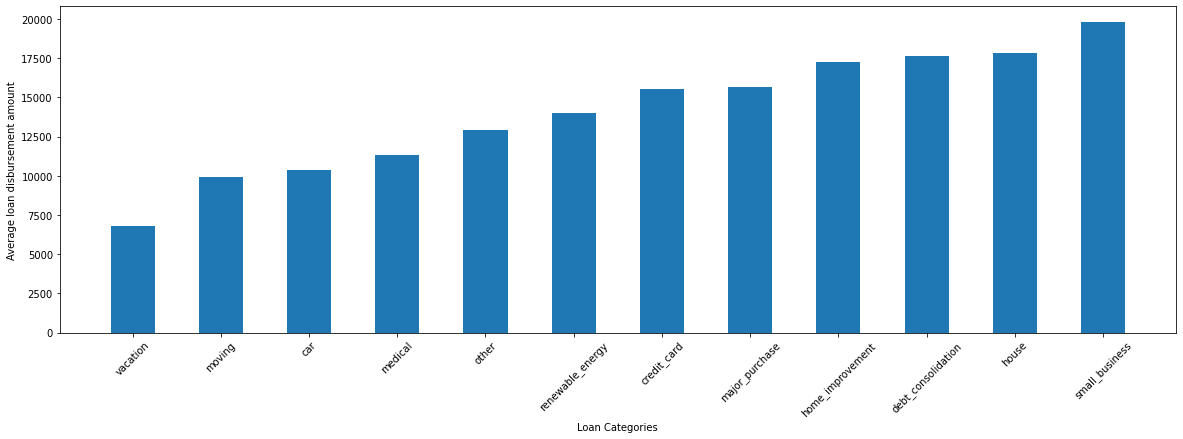

In [517]:
loan_reason = loan_data.groupby(['loan_purpose']).mean().reset_index()
loan_reason.sort_values(by='loan_amount', inplace=True)
plt.figure(figsize = (20,6))
plt.bar(loan_reason['loan_purpose'], height= loan_reason['loan_amount'], width=0.5, bottom=None)
plt.xlabel('Loan Categories')
plt.ylabel('Average loan disbursement amount')
plt.xticks(loan_reason['loan_purpose'], rotation =45)
plt.show()

### 3. Proportions if different grade of loans

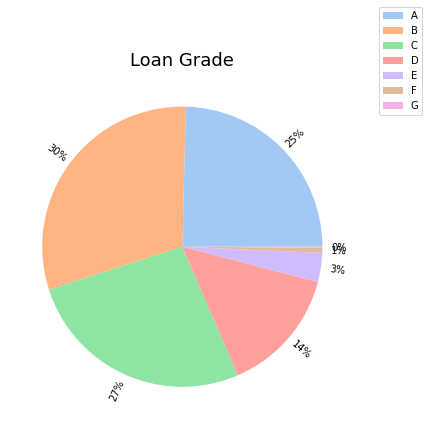

In [518]:
# https://stackoverflow.com/questions/64411633/how-to-rotate-the-percentage-label-in-a-pie-chart-to-match-the-category-label-ro

loan_reason_1 = loan_data.groupby(['grade']).count().reset_index()
colors = sns.color_palette('pastel')[0:12]
#create pie chart
plt.figure(figsize = (20,6))
patches, labels, pct_texts = plt.pie(loan_reason_1['loan_amount'], colors = colors, autopct='%.0f%%',rotatelabels=True, pctdistance=1.12)
for label, pct_text in zip(labels, pct_texts):
      pct_text.set_rotation(label.get_rotation())
plt.title('Loan Grade', fontsize=18)
plt.legend(labels = loan_reason_1['grade'], bbox_to_anchor=(1.2, 1.2))
plt.tight_layout()
plt.show()



Here we group the entries by the 'grade' category of loans and find the propotion of loans disbursed for each category.

This can give us an insight regarding the expected loan disbursement limit for different categories.

### 4. Grade categorization


In [519]:
loan_grade = loan_data.groupby(['grade']).mean().reset_index()
loan_grade

,grade,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,A,6.072247,89078.292395,16.580147,148002.248959,16.405931,0.107767,40.351752,2000.108987,1.509150,...,0.083774,15399.532330,37.298089,6.742631,458.216145,13394.976198,2294.883183,1995.202737,299.625925,0.054502
1,B,6.054780,80496.880030,18.705313,132972.343545,19.457559,0.222259,37.198384,2001.130392,1.882450,...,0.136319,16251.300626,42.811986,10.524103,456.277004,14410.407985,2332.450166,1830.829858,501.526467,0.093836
2,C,5.697293,74297.202382,20.358671,119011.475586,20.852369,0.248775,35.953471,2001.786280,2.164719,...,0.134565,16840.661515,45.616283,14.176698,479.486853,14944.345650,2586.917969,1890.684987,696.062258,0.170705
3,D,5.883295,71730.124170,22.025584,112292.429805,22.965625,0.304288,33.942577,2002.464039,2.363762,...,0.143154,16614.228907,47.269710,19.113451,505.757379,14813.657621,2704.215119,1788.762953,915.261674,0.190498
4,E,5.881579,67548.089552,23.709012,119705.858974,22.309231,0.280597,35.054645,2002.492537,2.492537,...,0.143284,18261.044776,52.262687,25.103403,581.000149,16062.293134,3490.778419,2198.751642,1291.884030,0.142746
5,F,5.500000,75540.689655,24.711228,113855.466667,22.860667,0.448276,40.071429,2000.517241,2.293103,...,0.086207,21922.844828,58.758621,29.401897,709.860000,20092.132069,3700.544464,1830.712759,1869.831724,0.000000
6,G,5.818182,72227.583333,23.839167,77000.000000,27.715000,0.000000,46.666667,2002.666667,2.083333,...,0.083333,25429.166667,58.000000,30.802500,864.645833,22700.065833,4845.670987,2729.100833,2116.570000,0.000000


## 5. Data Cleaning

After describing the data we have indentified the columns with missing values.


For cleaning the dataframe we will go column by column and analysis of each column will follow three strategies mentioned below - 


1. Missing value count being more than 70% -> Removing the column
2. Missing value count less than 70%-> Perform data imputation techniques based on distribution of columns and their correlation with other predictors

### 1) Missing value count being more than 70%
The columns 'annual_income_joint', 'verification_income_joint', 'debt_to_income_joint' and 'months_since_90d_late' have around 70% missing values. Imputing values in these columns based on the distibution of non null points might give unexpected values and affect the prediction of outcome. Hence we will remove these columns

Similarly the column 'num_accounts_120d_past_due' either comprises of null values or 0. The value 0 means that there no current accounts that are 120 days past due. Hence we remove this column as well.

We can also drop the columns 'loan_purpose', 'emp_title', 'state' as they have too many categoeries to be considered as factors. So we will remove these columns as well.

In [520]:
loan_data_clean = loan_data.drop(columns=['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint','emp_title','state','loan_purpose','num_accounts_120d_past_due','months_since_90d_late'])
loan_data_clean.head()

,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,6,28,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,RENT,40000.0,Not Verified,5.04,0,NaN,1996,1,30,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3.0,RENT,40000.0,Source Verified,21.15,0,28.0,2006,4,31,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,1.0,RENT,30000.0,Not Verified,10.16,0,NaN,2007,0,4,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,RENT,35000.0,Verified,57.96,0,NaN,2008,7,22,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


### 2) Missing value count between 70% and 1%

*emp_length* and *months_since_last_credit_inquiry*

In [521]:
# correlation plot
corr_1 = loan_data_clean.corr()
corr_1[['emp_length','months_since_last_credit_inquiry']].T

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.096469,0.026157,0.008242,0.028790,-0.234408,0.003753,0.133472,0.067415,0.147594,...,0.030083,0.091255,0.056243,-0.029621,0.075981,0.086768,0.024246,0.018153,0.049517,0.001851
months_since_last_credit_inquiry,0.008758,-0.050009,0.023670,0.005850,-0.027598,-0.010578,-0.535849,-0.151052,-0.125666,-0.069174,...,-0.049981,-0.028945,-0.031923,-0.100945,-0.033113,-0.019752,-0.030078,-0.023366,-0.055240,-0.026343


The columns 'emp_length' and 'months_since_last_credit_inquiry' are not highly correlated to any other column. So we can go ahead with it imputing values with considering distributions of other columns. For imputation we will use 3 parameters - mean, median and mode

Employee experience can vary from 1 to a higher value of 60. Here all the employees with more than 10 years of experience are lables with the experience of 10 years. So, the mode is 10. Generally employees with higher experience are in the position to get settled. Since we are dealing approved loans we will go ahead with imputing the missing values with __"mode"__.

Similary for the column __"months_since_last_credit_inquiry"__ the distribution is skewed to the right.

Looking at the non normal distribution of the predictors and values of mean and median we can concluded that these values will affect the distribution of the predictor. 

Hence we will go ahead imputing the missing values with mode

In [522]:
def mode_imputation(col_name):
  """Function to impute the missing values in a columns with mode"""
  para  = [loan_data_clean[col_name].mean(), loan_data_clean[col_name].median(),loan_data_clean[col_name].mode()[0]]
  print("Mean: ", para[0])
  print("Mean: ", para[1])
  print("Mean: ", para[2])
  # distribution plot before imputing the missing value
  sns.displot(loan_data_clean, x=col_name, kind="kde")
  plt.title("Distribution before imputation")

  loan_data_clean[col_name] = loan_data_clean[col_name].fillna(loan_data_clean[col_name].mode()[0])
  # distribution plot before imputing the missing value
  sns.displot(loan_data_clean, x=col_name, kind="kde")
  plt.title("Distribution after imputation")
  plt.show()

Mean:  5.930306000217794
Mean:  6.0
Mean:  10.0


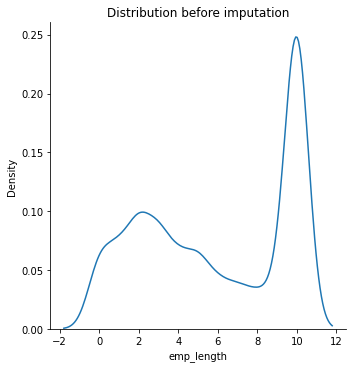

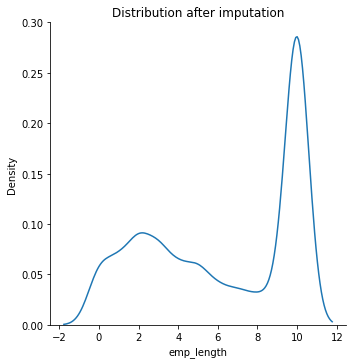

In [523]:
# mode imputation for emp_length
mode_imputation("emp_length")

Mean:  7.340703402451598
Mean:  6.0
Mean:  1.0


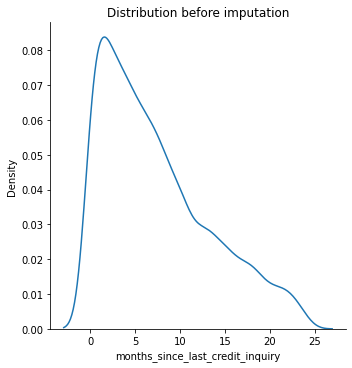

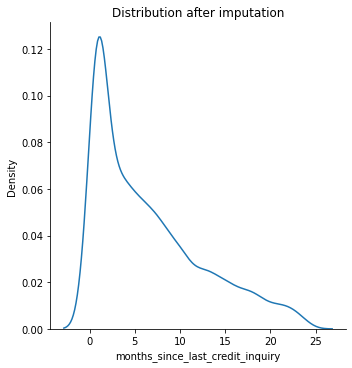

In [524]:
# mode imputation for months_since_last_credit_inquiry
mode_imputation("months_since_last_credit_inquiry")

*months_since_last_delinq*

In [525]:
# correlation plot
corr_months_since_last_delinq = loan_data_clean.corr()
corr_months_since_last_delinq = corr_months_since_last_delinq[['months_since_last_delinq']]
corr_months_since_last_delinq[abs(corr_months_since_last_delinq['months_since_last_delinq'])>0.5]

,months_since_last_delinq
delinq_2y,-0.566551
months_since_last_delinq,1.000000


After plotting the correlation plot for the __"months_since_last_delinq"__ we observe that it is has a high negative correlation with __"delinq_2y"__, since more the Delinquencies, more is the frequnecy and less is the time between two deliquencies.

Thus, we will impute the missing values with a univariate approach. We will predict the __"months_since_last_delinq"__ column using the columns with which it is highly correlated. We will use the IterativeImputer package from sklearn


In [526]:
# importing the pacakge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# initializing the imputer
impute_it = IterativeImputer()

# imputing the missing values with multivariate regression
regression_imputation = loan_data_clean[['delinq_2y','months_since_last_delinq']]
a = impute_it.fit_transform(regression_imputation)
loan_data_clean['months_since_last_delinq'] =np.round(a[:,1],2)

# confirming the count of missing values as 0
loan_data_clean['months_since_last_delinq'].isna().sum()

0

*debt_to_income*

In [527]:
corr_2 = loan_data_clean.corr()
corr_2[['debt_to_income']].T

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
debt_to_income,0.044248,-0.180445,1.0,-0.027517,0.027272,-0.0897,0.025388,0.198647,0.217078,0.075174,...,0.00656,0.056329,0.04649,0.141653,0.066408,0.065996,-0.003918,-0.020116,0.12116,-0.01011


In [528]:
data_missing

,Column_name,Data_Type,Null_count,isnull,Null_percent,Non_num,count,mean,std,min,25%,50%,75%,max
0,emp_title,object,833,T,8.33,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,emp_length,float64,817,T,8.17,F,9183.0,5.930306,3.703734,0.00,2.0000,6.00,10.0000,10.00
6,debt_to_income,float64,24,T,0.24,F,9976.0,19.308192,15.004851,0.00,11.0575,17.57,25.0025,469.09
7,annual_income_joint,float64,8505,T,85.05,F,1495.0,127914.571244,70168.375404,19200.00,86833.5000,113000.00,151545.5000,1100000.00
8,verification_income_joint,object,8545,T,85.45,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,debt_to_income_joint,float64,8505,T,85.05,F,1495.0,19.979304,8.054781,0.32,14.1600,19.72,25.5000,39.98
11,months_since_last_delinq,float64,5658,T,56.58,F,4342.0,36.760709,21.634939,1.00,19.0000,34.00,53.0000,118.00
20,months_since_90d_late,float64,7715,T,77.15,F,2285.0,46.112473,21.748021,2.00,29.0000,47.00,63.0000,128.00
25,months_since_last_credit_inquiry,float64,1271,T,12.71,F,8729.0,7.340703,5.981590,0.00,2.0000,6.00,11.0000,24.00
27,num_accounts_120d_past_due,float64,318,T,3.18,F,9682.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.00


The column __"debt_to_income"__  does not have high correlation with any other columns. 
Here the the data is right skewed so mean is out of question. Since this is a continuous variable and the mode frequency not being distinctly high with respect to other values we can go ahead with median imputation for this column

Mean :  19.308191659983976
Median :  17.57
Mode :  0    0.0
dtype: float64


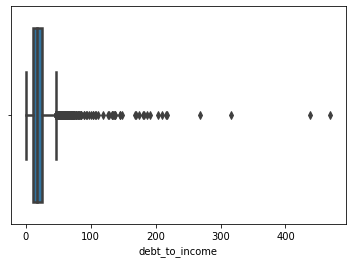

In [529]:
# sns.displot(loan_data_clean, x="debt_to_income", kind="kde")
ax = sns.boxplot(x="debt_to_income",data=loan_data_clean, linewidth=2.5)
print("Mean : ", loan_data_clean['debt_to_income'].mean())
print("Median : ", loan_data_clean['debt_to_income'].median())
print("Mode : ", loan_data_clean['debt_to_income'].mode())

In [530]:
loan_data_clean['debt_to_income'] = loan_data_clean['debt_to_income'].fillna(loan_data_clean['debt_to_income'].median)
loan_data_clean.isna().sum()
loan_data_clean.head()

,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,MORTGAGE,90000.0,Verified,18.01,0,38.00,2001,6,28,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,RENT,40000.0,Not Verified,5.04,0,43.05,1996,1,30,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3.0,RENT,40000.0,Source Verified,21.15,0,28.00,2006,4,31,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,1.0,RENT,30000.0,Not Verified,10.16,0,43.05,2007,0,4,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,RENT,35000.0,Verified,57.96,0,43.05,2008,7,22,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


Now that we have remvoed all the missing values we will have to format the categorical variables

### 1. Formatting binary variables
*disbursement_method*

We can drop the binary categorical variable __"disbursement_method"__ as it is highly imbalanced. Approximately 93% of data belongs to the class __"Cash"__.

In [531]:
loan_data_clean['disbursement_method'].value_counts()

Cash         9284
DirectPay     716
Name: disbursement_method, dtype: int64


*initial_listing_status*

We can drop the binary categorical variable __"initial_listing_status"__ as it is highly imbalanced. Approximately 82% of data belongs to the class __"whole"__.
Which means there are very few instance of __"fractional"__ which can contribute towards prediction. The dataset description does not precisely mention the use of this variable. So it is better to go ahead by disregarding this variable.

In [532]:
loan_data_clean['initial_listing_status'].value_counts()

whole         8206
fractional    1794
Name: initial_listing_status, dtype: int64

*application_type*

The column __"application_type"__ also has a disporportionate distribution. Moreover, we have already removed certain predictors pertaining to join appliation. Hence dropping this column. We can consider joint application in a separate analysis

In [533]:
loan_data_clean['application_type'].value_counts()

individual    8505
joint         1495
Name: application_type, dtype: int64

In [534]:
loan_data_clean = loan_data_clean.drop(columns=['initial_listing_status','disbursement_method','application_type'])
loan_data_clean.head()

,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,installment,grade,sub_grade,issue_month,loan_status,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,MORTGAGE,90000.0,Verified,18.01,0,38.00,2001,6,28,...,652.53,C,C3,Mar-2018,Current,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,RENT,40000.0,Not Verified,5.04,0,43.05,1996,1,30,...,167.54,C,C1,Feb-2018,Current,4651.37,499.12,348.63,150.49,0.0
2,3.0,RENT,40000.0,Source Verified,21.15,0,28.00,2006,4,31,...,71.40,D,D1,Feb-2018,Current,1824.63,281.80,175.37,106.43,0.0
3,1.0,RENT,30000.0,Not Verified,10.16,0,43.05,2007,0,4,...,664.19,A,A3,Jan-2018,Current,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,RENT,35000.0,Verified,57.96,0,43.05,2008,7,22,...,786.87,C,C3,Mar-2018,Current,21430.15,2324.65,1569.85,754.80,0.0


### 2. Formatting variables with more than 2 categories
*homeownership*

The homeownership has 3 classes as mentioned below. However the risk of loan disbursement depends more on the fact that it is against a mortgage or not. Hence we can go ahead with combining the class __"OWN"__ and __"RENT"__ and __"NON_MORTGAGE"__. This also ensures that the class count is balanced.

In [535]:
loan_data_clean['homeownership'].value_counts()

MORTGAGE    4789
RENT        3858
OWN         1353
Name: homeownership, dtype: int64

In [536]:
loan_data_clean.replace("OWN", "NON_MORTGAGE", inplace =True)
loan_data_clean.replace("RENT", "NON_MORTGAGE",inplace =True)

loan_data_clean['homeownership'].value_counts()

NON_MORTGAGE    5211
MORTGAGE        4789
Name: homeownership, dtype: int64

In [537]:
loan_data_clean['MORTGAGE'] = pd.get_dummies(loan_data_clean['homeownership'])['MORTGAGE']
loan_data_clean = loan_data_clean.drop(columns=['homeownership'])

*verified_income*

This column has 3 caregories, but the distribution is not highly imbalanced. So we can make use on hot coding.

reference article - https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64

In [538]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
loan_data_clean['verified_income_enocded'] = le.fit_transform(loan_data_clean.verified_income)

encoder = OneHotEncoder(categories = 'auto')
X = encoder.fit_transform(
    loan_data_clean['verified_income_enocded'].values.reshape(-1,1)).toarray()
dfonehot = pd.DataFrame(X, columns = ['isNotVerifed','isSourceVerified','isVerified'])

# Concatenating the one hot encoded data to the original data frame
loan_data_clean = pd.concat([loan_data_clean, dfonehot], axis =1)

#droping encoding column
loan_data_clean = loan_data_clean.drop(columns=['verified_income','verified_income_enocded'])


*sub_grade*

reference link - https://www.lendingclub.com/foliofn/rateDetail.action

Quoted from the reference link

"The Adjustment for Risk & Volatility is designed to cover expected losses and provide higher risk-adjusted returns for each loan grade increment from A1 to G5."

Considering this we will drop the grade columns and rank the subgrade with __"A1"__ being the lowest and __"G5"__ being the highest.


In [539]:
l = sorted(list(loan_data_clean.sub_grade.unique()))
rank = {}
for i in range(len(l)):
  rank[l[i]] =i+1
loan_data_clean['sub_grade_rank'] = [rank[ele] for ele in loan_data_clean['sub_grade']]

loan_data_clean = loan_data_clean.drop(columns=['grade','sub_grade'])
loan_data_clean.head()

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,balance,paid_total,paid_principal,paid_interest,paid_late_fees,MORTGAGE,isNotVerifed,isSourceVerified,isVerified,sub_grade_rank
0,3.0,90000.0,18.01,0,38.00,2001,6,28,10,70795,...,27015.86,1999.33,984.14,1015.19,0.0,1,0.0,0.0,1.0,13
1,10.0,40000.0,5.04,0,43.05,1996,1,30,14,28800,...,4651.37,499.12,348.63,150.49,0.0,0,1.0,0.0,0.0,11
2,3.0,40000.0,21.15,0,28.00,2006,4,31,10,24193,...,1824.63,281.80,175.37,106.43,0.0,0,0.0,1.0,0.0,16
3,1.0,30000.0,10.16,0,43.05,2007,0,4,4,25400,...,18853.26,3312.89,2746.74,566.15,0.0,0,1.0,0.0,0.0,3
4,10.0,35000.0,57.96,0,43.05,2008,7,22,16,69839,...,21430.15,2324.65,1569.85,754.80,0.0,0,0.0,0.0,1.0,13


*loan_status*

The column is highly dispropotionate with a high class imbalance within its categories. Majority of the columns are either paid or up to date on all outstanding payments.
This dataset does not have sufficient cases of the loan not being repayed or paid with a delay. Hence we can remove this column

In [540]:
loan_data_clean = loan_data_clean.drop(columns=['loan_status'])

### 3. Time series variables

*issue_month*

The issue months mentions the date of issue of the loan. Hence we can convert this into a datetime object

In [541]:
loan_data_clean['issue_date'] = pd.to_datetime(loan_data_clean['issue_month'])
loan_data_clean = loan_data_clean.drop(columns=['issue_month'])

In [542]:
loan_data_clean

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,paid_total,paid_principal,paid_interest,paid_late_fees,MORTGAGE,isNotVerifed,isSourceVerified,isVerified,sub_grade_rank,issue_date
0,3.0,90000.0,18.01,0,38.00,2001,6,28,10,70795,...,1999.33,984.14,1015.19,0.0,1,0.0,0.0,1.0,13,2018-03-01
1,10.0,40000.0,5.04,0,43.05,1996,1,30,14,28800,...,499.12,348.63,150.49,0.0,0,1.0,0.0,0.0,11,2018-02-01
2,3.0,40000.0,21.15,0,28.00,2006,4,31,10,24193,...,281.80,175.37,106.43,0.0,0,0.0,1.0,0.0,16,2018-02-01
3,1.0,30000.0,10.16,0,43.05,2007,0,4,4,25400,...,3312.89,2746.74,566.15,0.0,0,1.0,0.0,0.0,3,2018-01-01
4,10.0,35000.0,57.96,0,43.05,2008,7,22,16,69839,...,2324.65,1569.85,754.80,0.0,0,0.0,0.0,1.0,13,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,0,43.05,2008,5,44,13,199195,...,2969.80,2413.66,556.14,0.0,0,0.0,1.0,0.0,4,2018-01-01
9996,8.0,121000.0,32.38,4,9.00,1994,1,28,15,382061,...,1456.31,852.56,603.75,0.0,1,0.0,0.0,1.0,18,2018-02-01
9997,10.0,67000.0,45.26,2,6.00,2004,0,18,11,346402,...,4620.80,2382.35,2238.45,0.0,1,0.0,0.0,1.0,22,2018-02-01
9998,1.0,80000.0,11.99,0,43.05,1999,1,38,15,294475,...,2873.31,2481.88,391.43,0.0,1,0.0,1.0,0.0,1,2018-02-01
